In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [10]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [11]:
print(np.__version__)

1.26.4


In [12]:
#Defining some constants
FAST_RUN = False
IMAGE_WIDTH = 128 #pxl
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT) #Many image-processing libraries (like TensorFlow, Keras, or OpenCV) expect the size in this format when resizing.
IMAGE_CHANNELS = 3

# Defines the number of color channels in each image.
# Common values:
# 1 → Grayscale (black & white images).
# 3 → RGB (Red, Green, Blue → normal colored images).
# 4 → RGBA (RGB + Alpha channel for transparency).


In [13]:
import zipfile
import os

# Path to the zip file
zip_path = "/kaggle/input/dogs-vs-cats/train.zip"
extract_path = "/kaggle/working/train"  

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now list files
filenames = os.listdir(extract_path)
print(len(filenames), "files extracted")


1 files extracted


In [14]:
zipfile.is_zipfile("/kaggle/input/dogs-vs-cats/train.zip")

True

In [15]:
categories = []
filenames = os.listdir("/kaggle/working/train/train")

for filename in filenames:
    category = filename.split('.')[0] 
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

import pandas as pd
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(df.head())


        filename  category
0  cat.11878.jpg         0
1   dog.5977.jpg         1
2  dog.10784.jpg         1
3   dog.4333.jpg         1
4   cat.6289.jpg         0


In [16]:
print(df[df['filename'] == 'dog.11754.jpg'])


            filename  category
22689  dog.11754.jpg         1


In [17]:
df

,filename,category
0,cat.11878.jpg,0
1,dog.5977.jpg,1
2,dog.10784.jpg,1
3,dog.4333.jpg,1
4,cat.6289.jpg,0
...,...,...
24995,cat.2471.jpg,0
24996,dog.10091.jpg,1
24997,dog.10942.jpg,1
24998,dog.8889.jpg,1


<Axes: xlabel='category'>

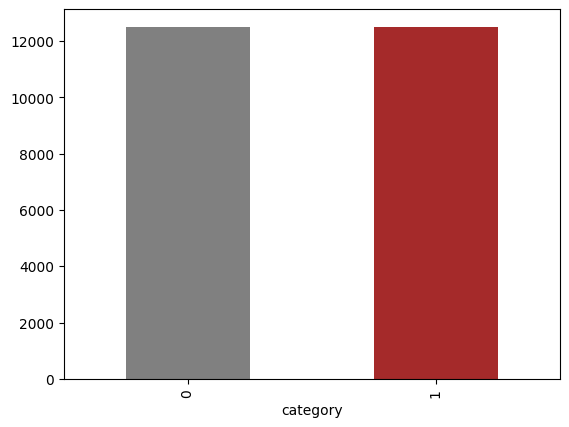

In [18]:
df['category'].value_counts().plot.bar(color = ['grey', 'brown'])

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [41]:

model = Sequential()

In [42]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [43]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [44]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [45]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [47]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [49]:
earlystop = EarlyStopping(patience=10)


In [52]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [54]:
callbacks = [earlystop, learning_rate_reduction]

In [64]:
df["category"] = df["category"].replace({0: 'Cat', 1: 'Dog'}) 

In [65]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

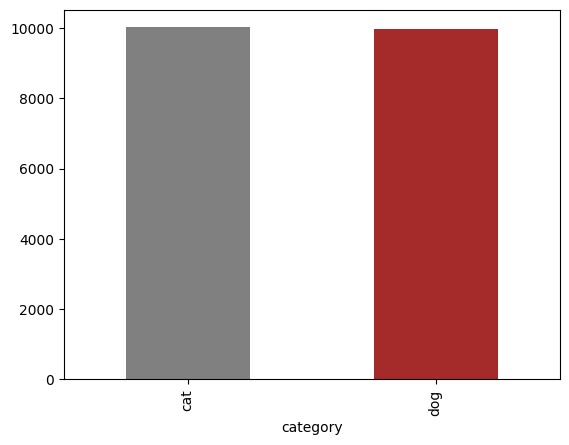

In [66]:
train_df['category'].value_counts().plot.bar(color = ['grey', 'brown'])

<Axes: xlabel='category'>

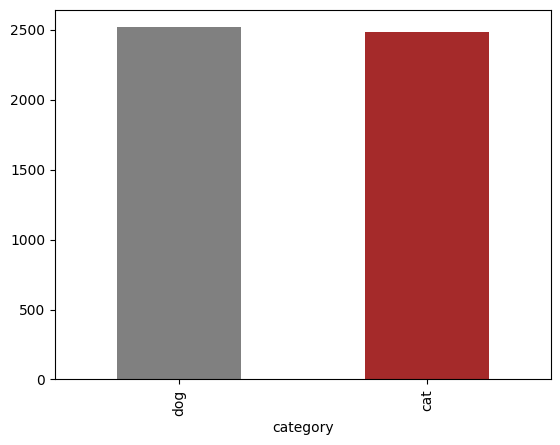

In [67]:
validate_df['category'].value_counts().plot.bar(color = ['grey', 'brown'])

In [68]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [69]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/working/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [74]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/working/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [76]:
epochs = 3 if FAST_RUN else 6

history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)


Epoch 1/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 584s 438ms/step - accuracy: 0.8155 - loss: 0.4114 - val_accuracy: 0.8372 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 2/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9333 - loss: 0.2196 - val_accuracy: 0.8358 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 3/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 596s 438ms/step - accuracy: 0.8185 - loss: 0.4083 - val_accuracy: 0.8298 - val_loss: 0.3714 - learning_rate: 0.0010
Epoch 4/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6667 - loss: 0.6511 - val_accuracy: 0.8408 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 5/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 585s 439ms/step - accuracy: 0.8310 - loss: 0.3847 - val_accuracy: 0.8330 - val_loss: 0.4088 - learning_rate: 0.0010
Epoch 6/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 1.0000 - loss: 0.1096 - val_accuracy: 0.8316 - val_loss: 0.4018 - learning_rate: 0.0010


*I only ran 6 epochs because my internet was extremely slow. For now, I’m stopping here and will revisit it later. In the meantime, I’ll consider the results from just these 6 epochs.*


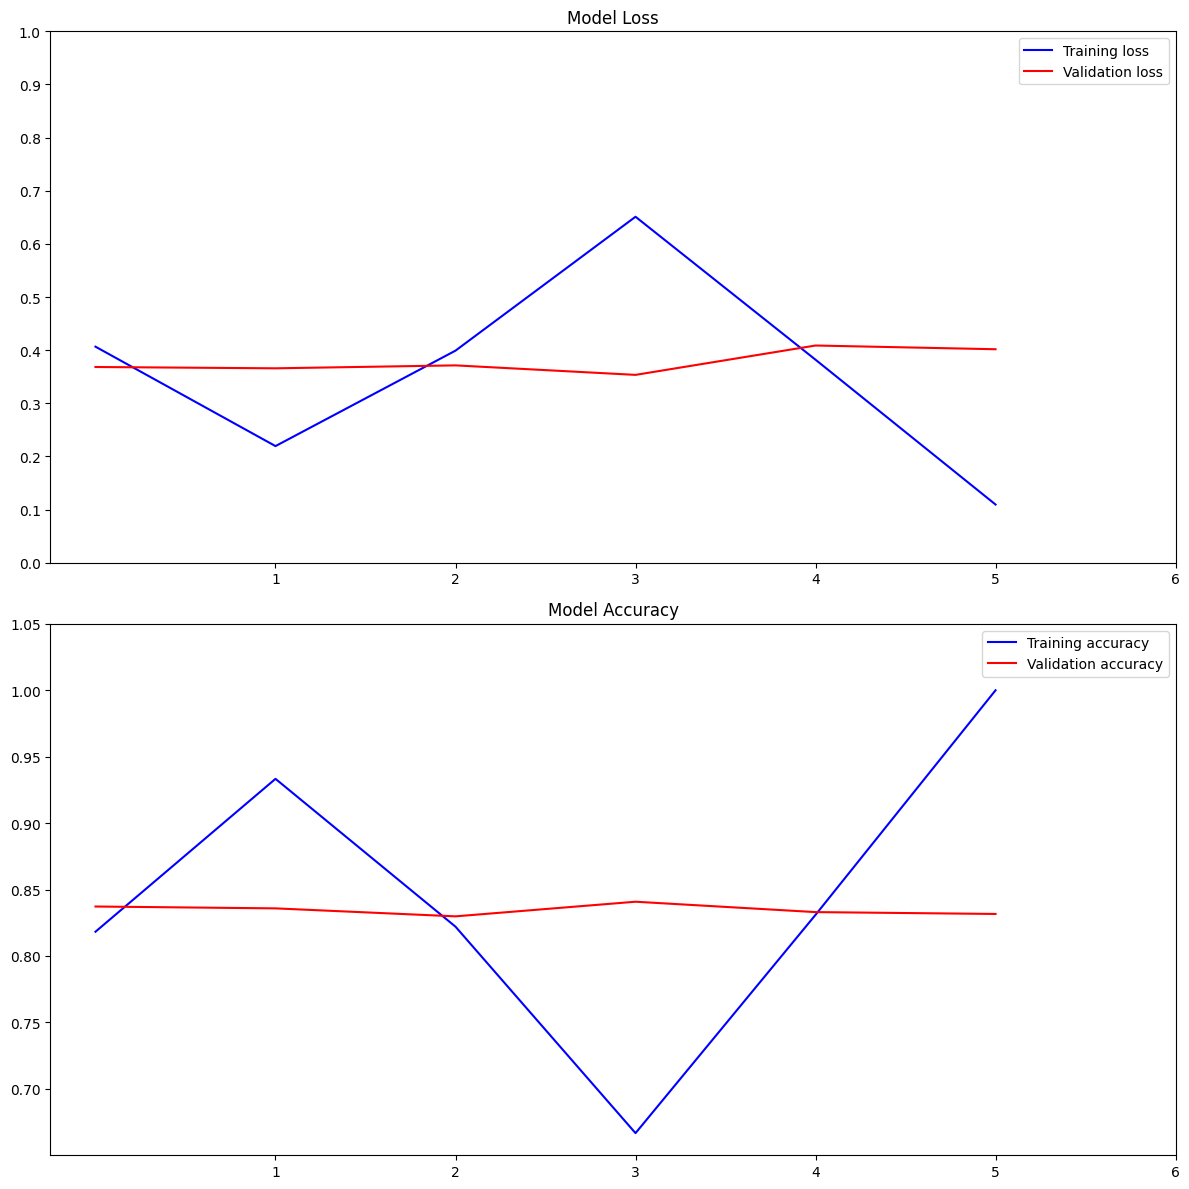

In [78]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot Loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs+1, 1))
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_title("Model Loss")
ax1.legend()

# Plot Accuracy
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs+1, 1))
ax2.set_yticks(np.arange(0.7, 1.05, 0.05))  # adjust to your accuracy range
ax2.set_title("Model Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()
